In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

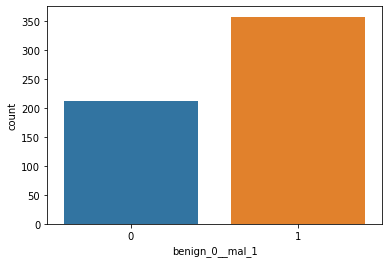

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

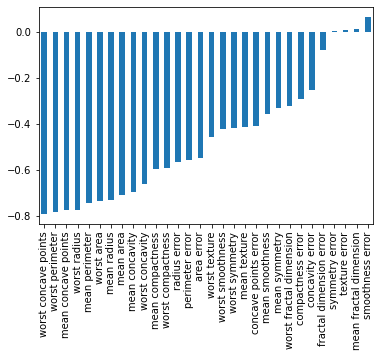

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

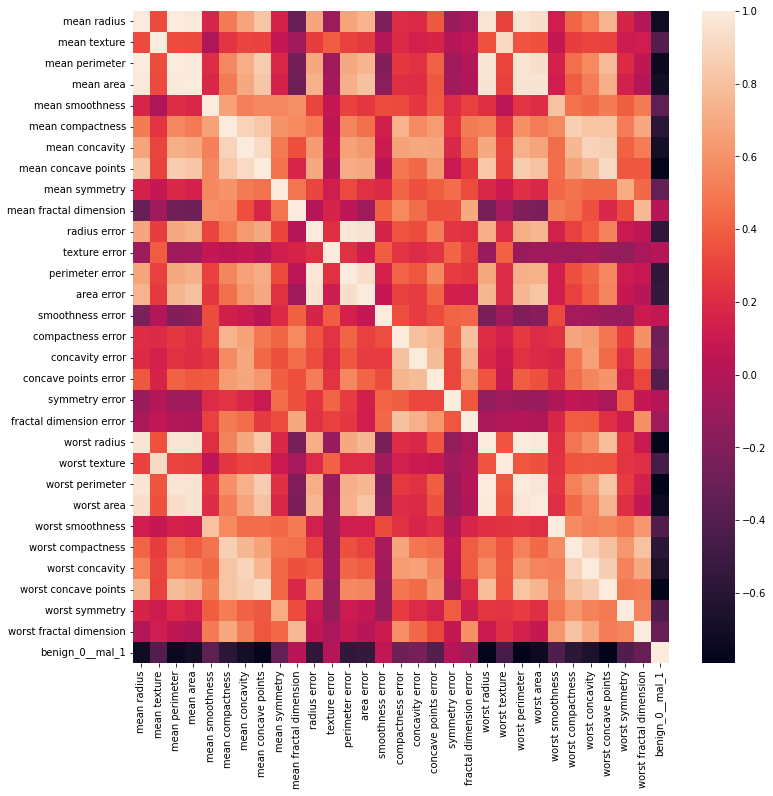

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [19]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [23]:
 model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7039 - val_loss: 0.6681
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6485 - val_loss: 0.6233
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6062 - val_loss: 0.5814
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5634 - val_loss: 0.5371
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5162 - val_loss: 0.4840
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4690 - val_loss: 0.4337
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4206 - val_loss: 0.3874
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3755 - val_loss: 0.3443
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3384 - val_loss: 0.3070
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3100 - val_loss: 0.2756
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.0560 - val_loss: 0.1083
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.1072
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.1041
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.1059
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0552 - val_loss: 0.1058
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.1109
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0562 - val_loss: 0.1052
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0623 - val_loss: 0.1087
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0567 - val_loss: 0.1039
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0523 - val_loss: 0.1095
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.1159
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.1217
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0431 - val_loss: 0.1133
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0408 - val_loss: 0.1171
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.1175
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.1183
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.1143
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0426 - val_loss: 0.1231
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.1153
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0448 - val_loss: 0.1128
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.1219
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.1249
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0372 - val_loss: 0.1242
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0349 - val_loss: 0.1240
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0350 - val_loss: 0.1217
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 0.1323
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0345 - val_loss: 0.1208
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0339 - val_loss: 0.1198
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.1214
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.1259
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0304 - val_loss: 0.1301
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0303 - val_loss: 0.1394
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.1299
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0295 - val_loss: 0.1328
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0317 - val_loss: 0.1359
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0445 - val_loss: 0.1303
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0486 - val_loss: 0.1309
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0364 - val_loss: 0.1225
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0319 - val_loss: 0.1349
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0330 - val_loss: 0.1319
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1530
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.1521
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1448
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.1391
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.1534
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.1390
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.1423
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.1528
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1476
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.1430
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.1446
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0245 - val_loss: 0.1712
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.1494
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.1712
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.1710
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0320 - val_loss: 0.1439
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.1793
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0342 - val_loss: 0.1433
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.1602
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 0.1625
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.2124
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.1609
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.1822
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 0.1717
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.1640
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.1759
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.1737
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.1779
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.1592
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.1725
Epoc

In [26]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.703925,0.668088
1,0.648455,0.623320
2,0.606217,0.581398
3,0.563381,0.537085
4,0.516239,0.484041
...,...,...
595,0.018862,0.175032
596,0.018571,0.186918
597,0.019276,0.172571
598,0.018595,0.186833


In [25]:
losses = pd.DataFrame(model.history.history)

In [27]:
losses

,loss,val_loss
0,0.703925,0.668088
1,0.648455,0.623320
2,0.606217,0.581398
3,0.563381,0.537085
4,0.516239,0.484041
...,...,...
595,0.018862,0.175032
596,0.018571,0.186918
597,0.019276,0.172571
598,0.018595,0.186833


<AxesSubplot:>

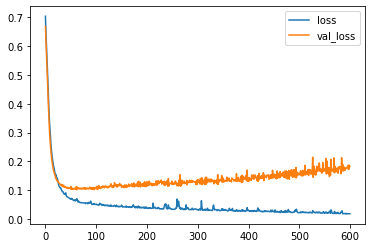

In [28]:
losses.plot()

In [37]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [38]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [33]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,
                          patience=25)

In [39]:
 model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6642 - val_loss: 0.6384
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6204 - val_loss: 0.5966
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5756 - val_loss: 0.5465
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5233 - val_loss: 0.4884
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4680 - val_loss: 0.4316
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4146 - val_loss: 0.3796
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3706 - val_loss: 0.3339
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3289 - val_loss: 0.2985
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2985 - val_loss: 0.2677
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2723 - val_loss: 0.2431
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.1091
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0496 - val_loss: 0.1098
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0489 - val_loss: 0.1077
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0523 - val_loss: 0.1145
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0498 - val_loss: 0.1129
Epoch 87: early stopping


<AxesSubplot:>

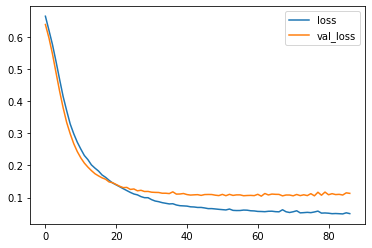

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [42]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [43]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6941 - val_loss: 0.6595
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6543 - val_loss: 0.6338
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6428 - val_loss: 0.5983
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5965 - val_loss: 0.5571
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5842 - val_loss: 0.5259
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5536 - val_loss: 0.4902
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5275 - val_loss: 0.4579
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4934 - val_loss: 0.4211
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4719 - val_loss: 0.3854
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4563 - val_loss: 0.3614
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1128 - val_loss: 0.1071
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0997 - val_loss: 0.0912
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1238 - val_loss: 0.0933
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1090 - val_loss: 0.0938
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0941 - val_loss: 0.0944
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1155 - val_loss: 0.1027
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1009 - val_loss: 0.0953
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1057 - val_loss: 0.0970
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0945 - val_loss: 0.0900
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1016 - val_loss: 0.0947
Epoch 93/600


In [44]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

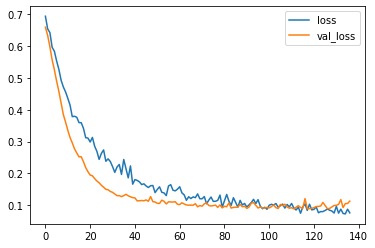

In [45]:
model_loss.plot()

In [51]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1) 

In [52]:
classes_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



/home/filipe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/filipe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/filipe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [58]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [60]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
